In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/cleaned_data_final_output.csv')

# Function to create a pivot table and chart
def generate_pivot_chart(df, index, title, chart_type='bar', bins=None):
    if bins:
        df[index] = pd.cut(df[index], bins=bins)

    pivot = df.pivot_table(index=index, values='converted', aggfunc=['count', 'sum'])
    pivot.columns = ['Total Leads', 'Converted Leads']
    pivot['Conversion Rate (%)'] = (pivot['Converted Leads'] / pivot['Total Leads']) * 100
    pivot = pivot.sort_values(by='Conversion Rate (%)', ascending=False)


    print(f"\n{title}\n")
    print(pivot)

    # Creating the graph
    plt.figure(figsize=(10,6))
    if chart_type == 'bar':
        pivot['Conversion Rate (%)'].plot(kind='bar', color='skyblue')
    elif chart_type == 'pie':
        pivot['Converted Leads'].plot(kind='pie', autopct='%1.1f%%')
    elif chart_type == 'line':
        pivot['Conversion Rate (%)'].plot(kind='line', marker='o', color='red')

    plt.title(title)
    plt.xlabel(index)
    plt.ylabel('Conversion Rate (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    return pivot


Conversion Rate by Vendor

                 Total Leads  Converted Leads  Conversion Rate (%)
vendorid                                                          
callQualifier            152             14.0             9.210526
healthcare              8084            231.0             2.857496
msdtwo                   226              6.0             2.654867
msd                     7378            144.0             1.951748
kwinst                   114              2.0             1.754386
quotewizard            36916            495.0             1.340882
infinix                96444           1139.0             1.180996
astoria                 2772             30.0             1.082251
acs                     1474             13.0             0.881954
alpha                 138468           1168.0             0.843516
h1insurance            26484            193.0             0.728742
rrMedia                65124            415.0             0.637246
contactability         32136      

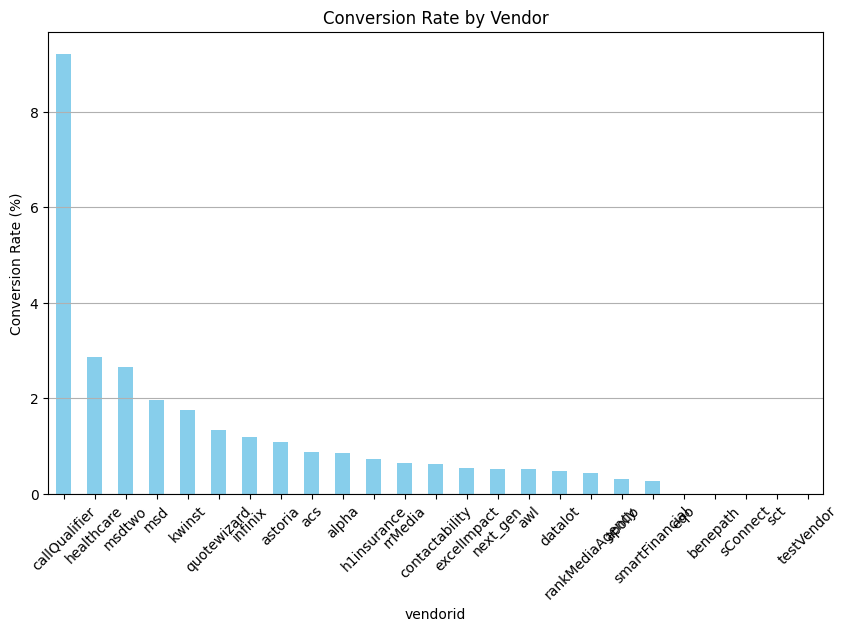

,Total Leads,Converted Leads,Conversion Rate (%)
vendorid,,,
callQualifier,152,14.0,9.210526
healthcare,8084,231.0,2.857496
msdtwo,226,6.0,2.654867
msd,7378,144.0,1.951748
kwinst,114,2.0,1.754386
quotewizard,36916,495.0,1.340882
infinix,96444,1139.0,1.180996
astoria,2772,30.0,1.082251
acs,1474,13.0,0.881954


In [ ]:
#1. Conversion by Vendor
generate_pivot_chart(df, 'vendorid', 'Conversion Rate by Vendor')


Optimized Conversion Rate by Landing Page



,Total Leads,Converted Leads,Conversion Rate (%)
vendorlandingpage,,,
https://pickhealthinsurance.com/form/,28914,391.0,1.352286
UNKNOWN,113718,1263.0,1.110642
https://www.obamacareplans.com,36066,298.0,0.826263
https://www.obamacare-plans.com,31988,243.0,0.759660
unknown,22010,149.0,0.676965
https://compare.gethealthcoverage.org,65150,415.0,0.636992
https://smartfinancial.com/get-fast-quote-health.html%23/quote-ready,26532,154.0,0.580431
https://www.insurancequotes.com/,15850,81.0,0.511041
https://www.online-health-insurance.com,16512,74.0,0.448159


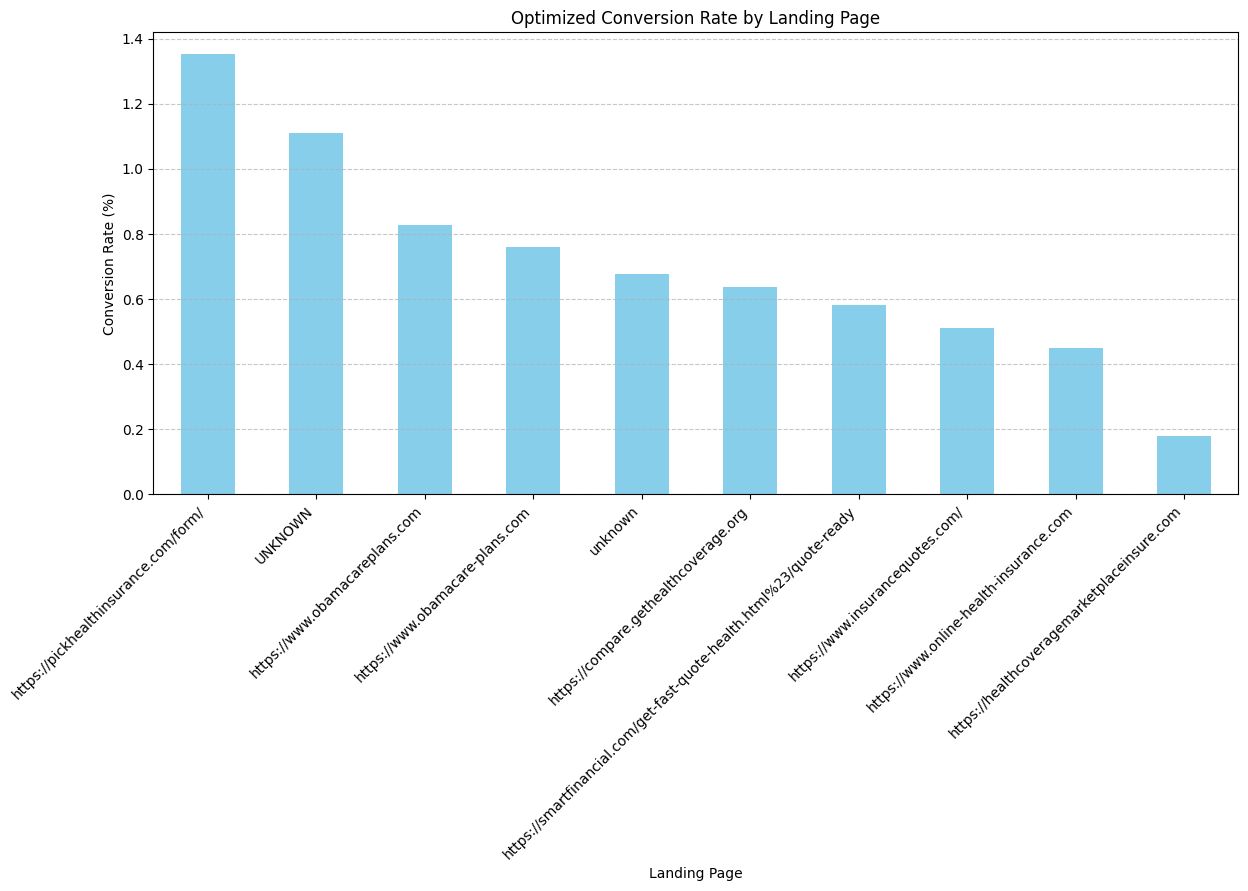

In [ ]:
#2 Optimized Conversion Rate by Landing Page
import pandas as pd
import matplotlib.pyplot as plt

def generate_pivot_chart(df, column, title):
    top_values = df[column].value_counts().nlargest(10).index
    df_filtered = df[df[column].isin(top_values)]

    pivot = df_filtered.pivot_table(index=column, values='converted', aggfunc=['count', 'sum'])
    pivot.columns = ['Total Leads', 'Converted Leads']
    pivot['Conversion Rate (%)'] = (pivot['Converted Leads'] / pivot['Total Leads']) * 100
    pivot = pivot.sort_values(by='Conversion Rate (%)', ascending=False)

    print(f"\n{title}\n")
    display(pivot)

    plt.figure(figsize=(14, 6))
    pivot['Conversion Rate (%)'].plot(kind='bar', color='skyblue')

    plt.title(title)
    plt.xlabel("Landing Page")
    plt.ylabel("Conversion Rate (%)")
    plt.xticks(rotation=45, ha='right')  # Rotation pour lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

generate_pivot_chart(df, 'vendorlandingpage', 'Optimized Conversion Rate by Landing Page')



Conversion Rate by Income Bin

           Total Leads  Converted Leads  Conversion Rate (%)
incomebin                                                   
150000            4582            111.0             2.422523
100000           30494            604.0             1.980718
120000            2464             46.0             1.866883
> 150000          2836             50.0             1.763047
130000            9270            128.0             1.380798
140000             740             10.0             1.351351
110000           11420            127.0             1.112084
70000            47720            512.0             1.072925
80000            28958            229.0             0.790800
60000            74478            569.0             0.763984
40000            83166            610.0             0.733473
50000           104578            712.0             0.680832
90000            26918            167.0             0.620403
20000            66890            386.0             0

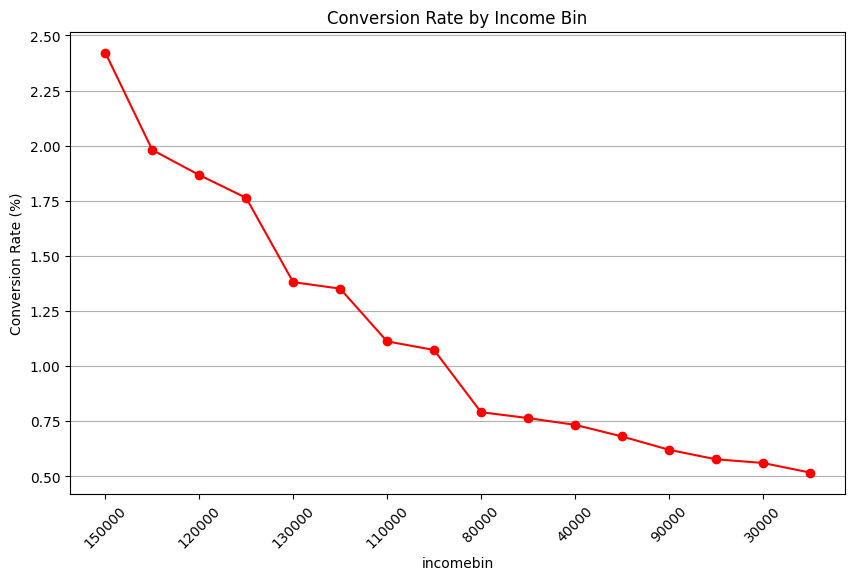

,Total Leads,Converted Leads,Conversion Rate (%)
incomebin,,,
150000,4582,111.0,2.422523
100000,30494,604.0,1.980718
120000,2464,46.0,1.866883
> 150000,2836,50.0,1.763047
130000,9270,128.0,1.380798
140000,740,10.0,1.351351
110000,11420,127.0,1.112084
70000,47720,512.0,1.072925
80000,28958,229.0,0.790800


In [ ]:
#4. Conversion BY Income Bin
generate_pivot_chart(df, 'incomebin', 'Conversion Rate by Income Bin', chart_type='line')


Conversion Rate by State

         Total Leads  Converted Leads  Conversion Rate (%)
state                                                     
MT              3126             39.0             1.247601
WY              2400             29.0             1.208333
NV             18360            212.0             1.154684
CO             21284            240.0             1.127608
DE              3660             39.0             1.065574
UT              8028             85.0             1.058794
MD             32958            311.0             0.943625
SD              2460             23.0             0.934959
IL             31816            291.0             0.914634
KS              7154             65.0             0.908583
OH             24310            204.0             0.839161
VA             25924            216.0             0.833205
FL             63980            525.0             0.820569
TX             81094            643.0             0.792907
MI             24200         

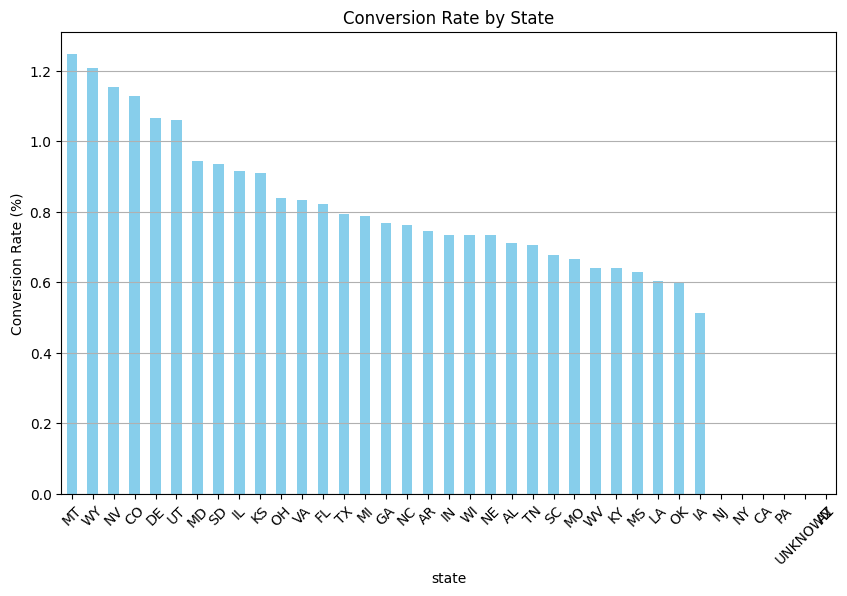

,Total Leads,Converted Leads,Conversion Rate (%)
state,,,
MT,3126,39.0,1.247601
WY,2400,29.0,1.208333
NV,18360,212.0,1.154684
CO,21284,240.0,1.127608
DE,3660,39.0,1.065574
UT,8028,85.0,1.058794
MD,32958,311.0,0.943625
SD,2460,23.0,0.934959
IL,31816,291.0,0.914634


In [ ]:
#5. Conversion BY State
generate_pivot_chart(df, 'state', 'Conversion Rate by State', chart_type='bar')


Conversion Rate by Campaign



,Total Leads,Converted Leads,Conversion Rate (%)
mpvendorcampaignname,,,
infinix_39999,24784,232.0,0.936088
quotewizard_Shared%20MLPP,24978,210.0,0.840740
alpha_Shared,135672,1097.0,0.808568
contactability_https://smartfinancial%2ecom/get-fast-quote-health%2ehtml%2523/quote-ready,26056,153.0,0.587197
rrMedia_Exclusive%20under$50k,55984,322.0,0.575164
infinix_24999,34864,199.0,0.570789
rankMediaAgency_RankMedia_173_410_No_Income_Filter,31842,172.0,0.540167
rankMediaAgency_Exclusive%20MLPP,28168,98.0,0.347913
rankMediaAgency_Shared%20MLPP,34176,111.0,0.324789


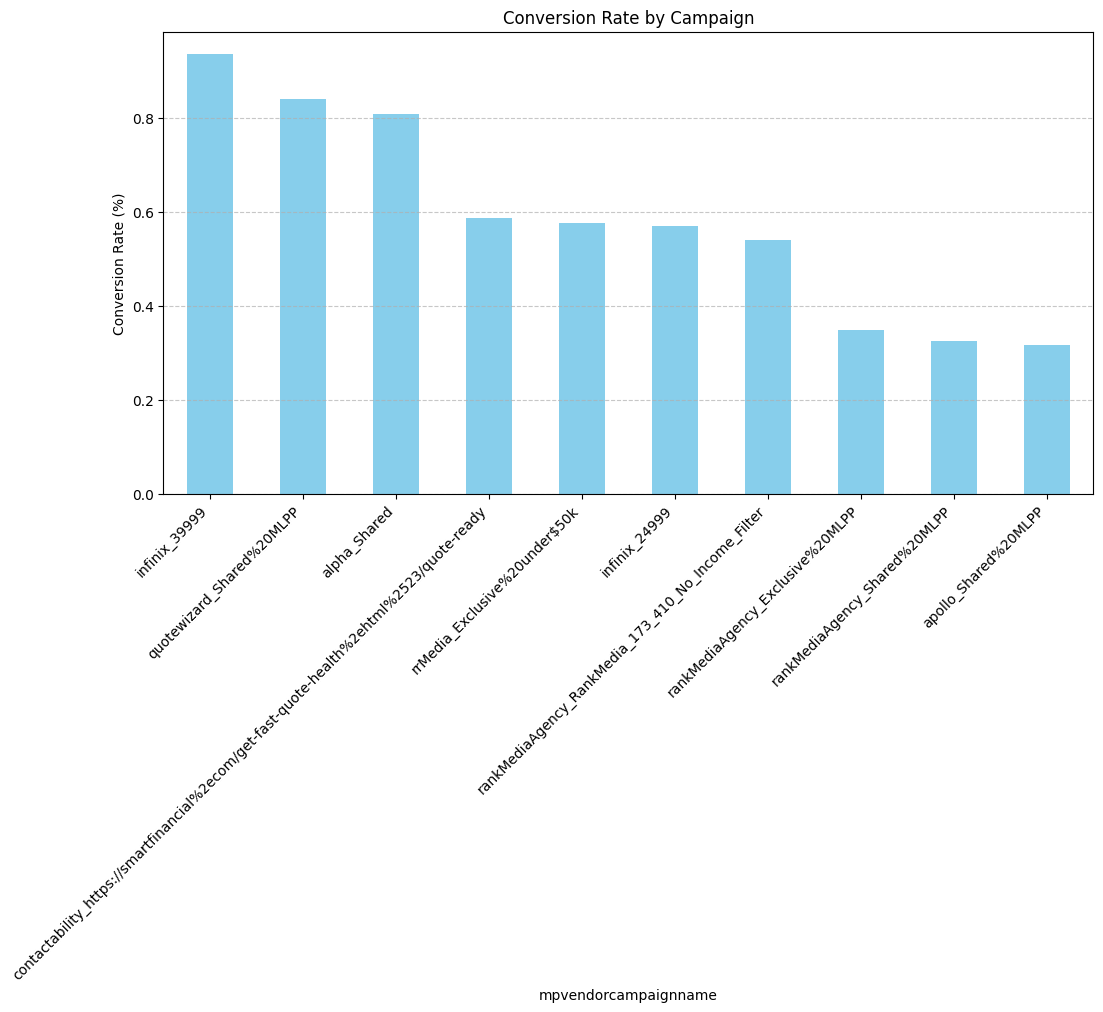

In [ ]:
#6  Conversion BY Campaign

import matplotlib.pyplot as plt

top_campaigns = df['mpvendorcampaignname'].value_counts().nlargest(10).index
df_filtered = df[df['mpvendorcampaignname'].isin(top_campaigns)]

pivot = df_filtered.pivot_table(index='mpvendorcampaignname', values='converted', aggfunc=['count', 'sum'])
pivot.columns = ['Total Leads', 'Converted Leads']
pivot['Conversion Rate (%)'] = (pivot['Converted Leads'] / pivot['Total Leads']) * 100
pivot = pivot.sort_values(by='Conversion Rate (%)', ascending=False)

plt.figure(figsize=(12, 6))
pivot['Conversion Rate (%)'].plot(kind='bar', color='skyblue')

plt.title("Optimized Conversion Rate by Campaign")
plt.xlabel("Campaign Name")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45, ha='right')  # Rotation pour lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

generate_pivot_chart(df, 'mpvendorcampaignname', 'Conversion Rate by Campaign')




Optimized Conversion Rate by Lead Source



,Total Leads,Converted Leads,Conversion Rate (%)
lead_source_grouped,,,
Autres,160622,1916.0,1.192863
wTwBllnT,135672,1097.0,0.808568
34TYGQu3,30220,340.0,1.125083
uqpQwUdb,55984,322.0,0.575164
K-UQp3CT,40436,301.0,0.744386
EBz5JkjA,24978,210.0,0.840740
d6N7dReU,32136,198.0,0.616131
zbOm0Z0A,31842,172.0,0.540167
O6JH0oqw,34176,111.0,0.324789


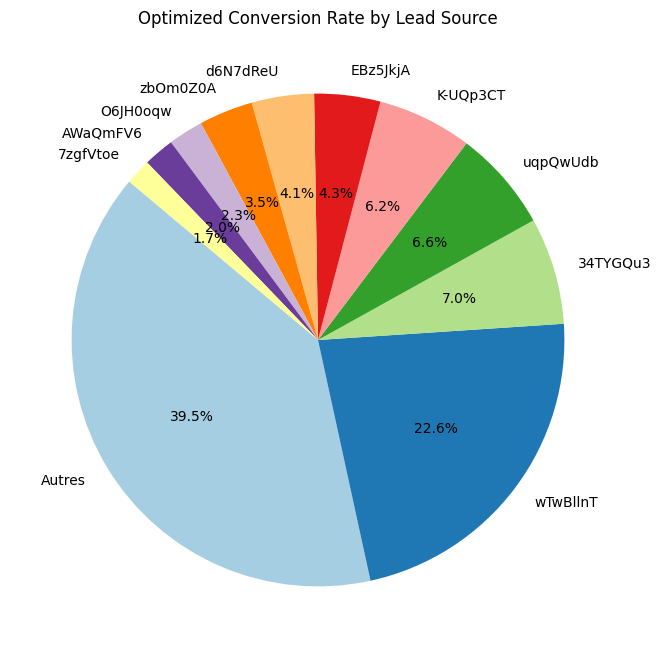

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_sources = df['layerid'].value_counts().nlargest(10).index
df['lead_source_grouped'] = df['layerid'].apply(lambda x: x if x in top_sources else 'Autres')

pivot = df.groupby('lead_source_grouped')['converted'].agg(['count', 'sum'])
pivot.columns = ['Total Leads', 'Converted Leads']
pivot['Conversion Rate (%)'] = (pivot['Converted Leads'] / pivot['Total Leads']) * 100
pivot = pivot.sort_values(by='Converted Leads', ascending=False)

print("\nOptimized Conversion Rate by Lead Source\n")
display(pivot)

plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors  # Palette de couleurs plus variée
plt.pie(pivot['Converted Leads'], labels=pivot.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title("Optimized Conversion Rate by Lead Source")
plt.show()



Optimized Conversion Rate by Agent



,Total Leads,Converted Leads,Conversion Rate (%)
mpagentid,,,
us-east-1:b35389ad-7329-42e4-b6ee-b8536046cb08,17364,138.0,0.794748
us-east-1:6d8f226b-dccb-4afe-a708-3aa03cc9498c,17410,136.0,0.781160
us-east-1:e6d0908b-1475-4b2f-91d2-67962b988a72,174816,1355.0,0.775101
us-east-1:6290ec96-63b7-49b2-bb78-0d1166c1a1ea,34206,228.0,0.666550
us-east-1:b994f676-6209-49ac-b297-75d77764fb8d,42210,279.0,0.660981
us-east-1:f1de2276-484c-45d0-9408-15630ea8b59e,68628,448.0,0.652795
us-east-1:ca40fcfe-a78f-483e-a374-6a36e522a7ef,22894,146.0,0.637722
us-east-1:417d6363-e1e7-4eda-86af-baf1d2fe3e6a,16230,92.0,0.566852
us-east-1:dfb95585-489d-49bb-beff-cbf03c3c1111,13878,76.0,0.547629


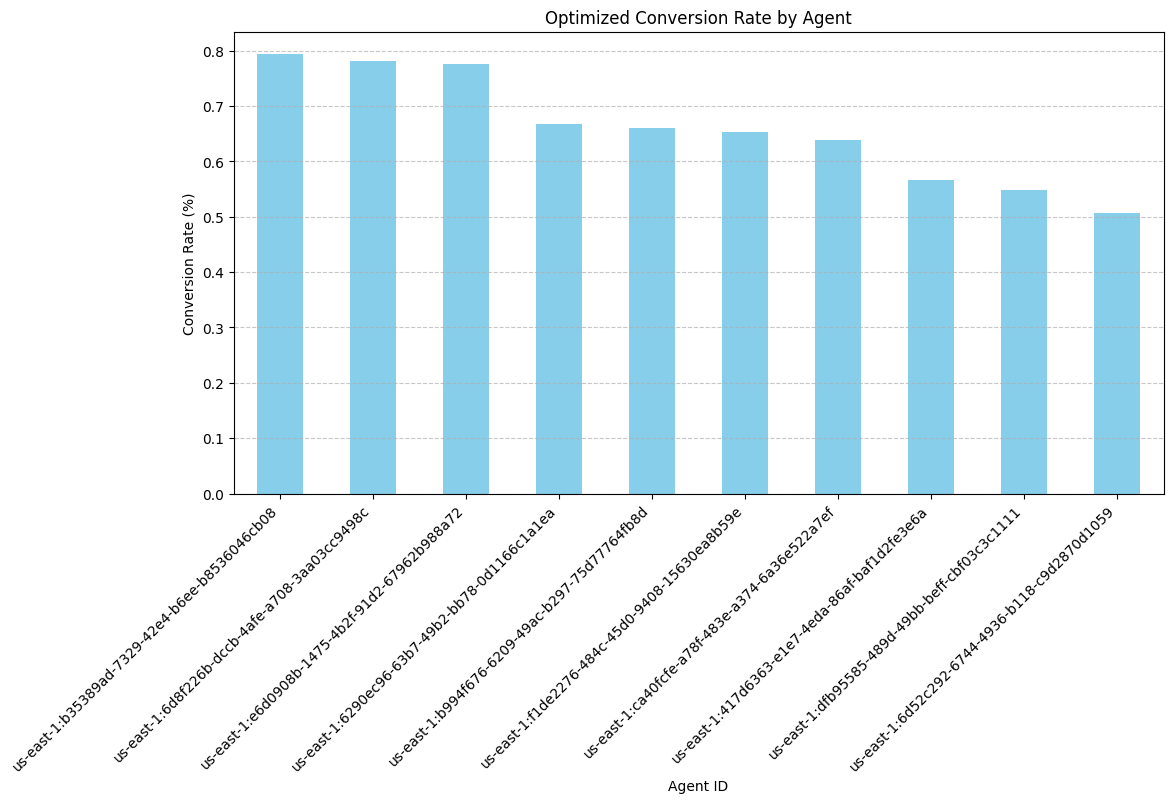

In [ ]:
#8
import pandas as pd
import matplotlib.pyplot as plt

top_agents = df['mpagentid'].value_counts().nlargest(10).index
df_filtered = df[df['mpagentid'].isin(top_agents)]

pivot = df_filtered.pivot_table(index='mpagentid', values='converted', aggfunc=['count', 'sum'])
pivot.columns = ['Total Leads', 'Converted Leads']
pivot['Conversion Rate (%)'] = (pivot['Converted Leads'] / pivot['Total Leads']) * 100
pivot = pivot.sort_values(by='Conversion Rate (%)', ascending=False)

print("\nOptimized Conversion Rate by Agent\n")
display(pivot)

plt.figure(figsize=(12, 6))
pivot['Conversion Rate (%)'].plot(kind='bar', color='skyblue')

plt.title("Optimized Conversion Rate by Agent")
plt.xlabel("Agent ID")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



Conversion Rate by Positive Contact

                     Total Leads  Converted Leads  Conversion Rate (%)
is_contact_positive                                                   
1                           5938           2955.0            49.764230
0                         594130           1892.0             0.318449


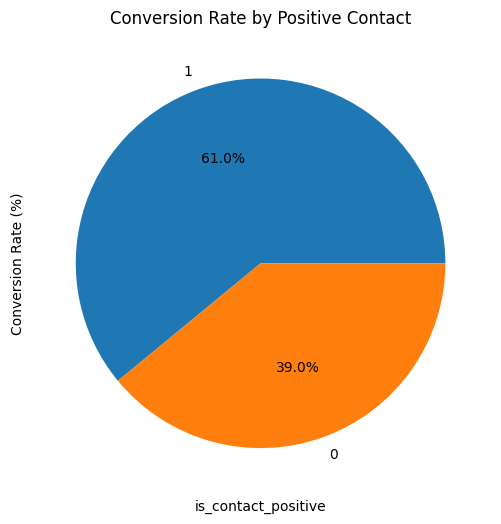

,Total Leads,Converted Leads,Conversion Rate (%)
is_contact_positive,,,
1,5938,2955.0,49.764230
0,594130,1892.0,0.318449


In [ ]:
# 9. Conversion BY Contact Positif
generate_pivot_chart(df, 'is_contact_positive', 'Conversion Rate by Positive Contact', chart_type='pie')

<ipython-input-18-b44807c1f8d4>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index=index, values='converted', aggfunc=['count', 'sum'])
<ipython-input-18-b44807c1f8d4>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index=index, values='converted', aggfunc=['count', 'sum'])



Conversion Rate by Callback Count

                          Total Leads  Converted Leads  Conversion Rate (%)
vs_callback_result_count                                                   
(3.0, 5.0]                       4296            230.0             5.353818
(1.0, 3.0]                       9998            527.0             5.271054
(10.0, 88.0]                     1354             66.0             4.874446
(5.0, 10.0]                      3654            160.0             4.378763
(0.0, 1.0]                      27592            727.0             2.634822


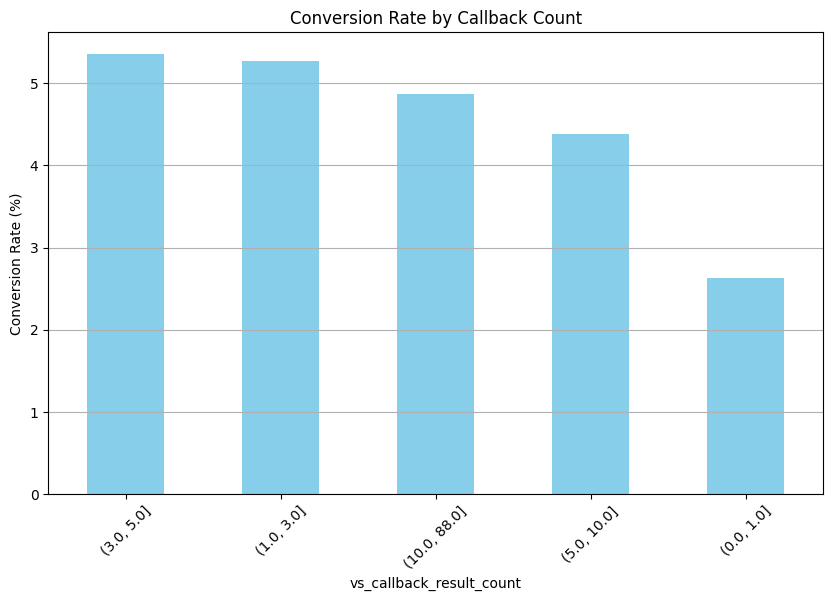

,Total Leads,Converted Leads,Conversion Rate (%)
vs_callback_result_count,,,
"(3.0, 5.0]",4296,230.0,5.353818
"(1.0, 3.0]",9998,527.0,5.271054
"(10.0, 88.0]",1354,66.0,4.874446
"(5.0, 10.0]",3654,160.0,4.378763
"(0.0, 1.0]",27592,727.0,2.634822


In [ ]:
# 10.Conversion Rate by Callback Count
callback_bins = [0, 1, 3, 5, 10, df['vs_callback_result_count'].max()]
generate_pivot_chart(df, 'vs_callback_result_count', 'Conversion Rate by Callback Count', chart_type='bar', bins=callback_bins)

<ipython-input-18-b44807c1f8d4>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index=index, values='converted', aggfunc=['count', 'sum'])
<ipython-input-18-b44807c1f8d4>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index=index, values='converted', aggfunc=['count', 'sum'])



Conversion Rate by Total Talk Time

                    Total Leads  Converted Leads  Conversion Rate (%)
total_vs_call_time                                                   
(300.0, 75763.0]         445306           4306.0             0.966976
(0.0, 60.0]               12368             61.0             0.493208
(60.0, 120.0]             23146             84.0             0.362914
(120.0, 300.0]           119248            396.0             0.332081


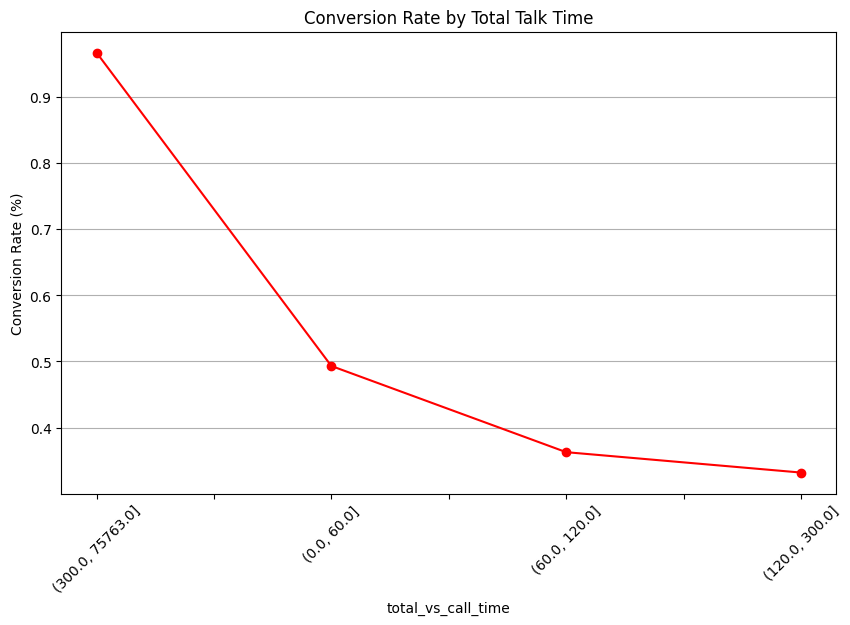

In [ ]:
# 11.Conversion Rate by Total Talk Time
# Check if the column name exists, if not, handle it appropriately
column_name = 'total_vs_call_time'
if column_name in df.columns:
    talk_time_bins = [0, 60, 120, 300, df[column_name].max()]
    generate_pivot_chart(df, column_name, 'Conversion Rate by Total Talk Time', chart_type='line', bins=talk_time_bins)
else:
    print(f"Column '{column_name}' not found in the DataFrame. Please check your data.")

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/cleaned_data_final_output.csv")
print(df.columns.tolist())


['leadcreatedtime', 'soldtoagenttime', 'mpleadid', 'phonetype', 'state', 'householdsize', 'age', 'income', 'incomebin', 'corpleadid', 'pageurl', 'device', 'avgmlscore', 'vendorid', 'layerid', 'mpagentid', 'mpvendorcampaignname', 'category/description', 'vendorsubid', 'vendorpubid', 'trustedformcertid', 'jornayaleadid', 'vendorlandingpage', 'vendorleadid', 'vendorsource', 'vs_last_result', 'vendorpricedollars', 'vs_result_code_sold', 'vsagentmarkedsold', 'homeofficeconversion', 'mpsubmittedpolicyrecord', 'converted', 'total_vs_call_time', 'vs_total_talk_time', 'vs_no_contact_count', 'vs_callback_result_count', 'vs_positive_contact_count', 'vs_negative_contact_count', 'last_vs_no_contact_time', 'last_vs_callback_result_time', 'vs_last_result_code', 'submittedapplicationdate', 'submittedannual', 'is_contact_positive']


<ipython-input-18-b44807c1f8d4>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index=index, values='converted', aggfunc=['count', 'sum'])
<ipython-input-18-b44807c1f8d4>:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index=index, values='converted', aggfunc=['count', 'sum'])



Conversion Rate by Vendor Price

                    Total Leads  Converted Leads  Conversion Rate (%)
vendorpricedollars                                                   
(50.0, 70.0]               8546            251.0             2.937047
(20.0, 50.0]              38404            815.0             2.122175
(10.0, 20.0]              74748            854.0             1.142505
(0.0, 10.0]              478352           2927.0             0.611892


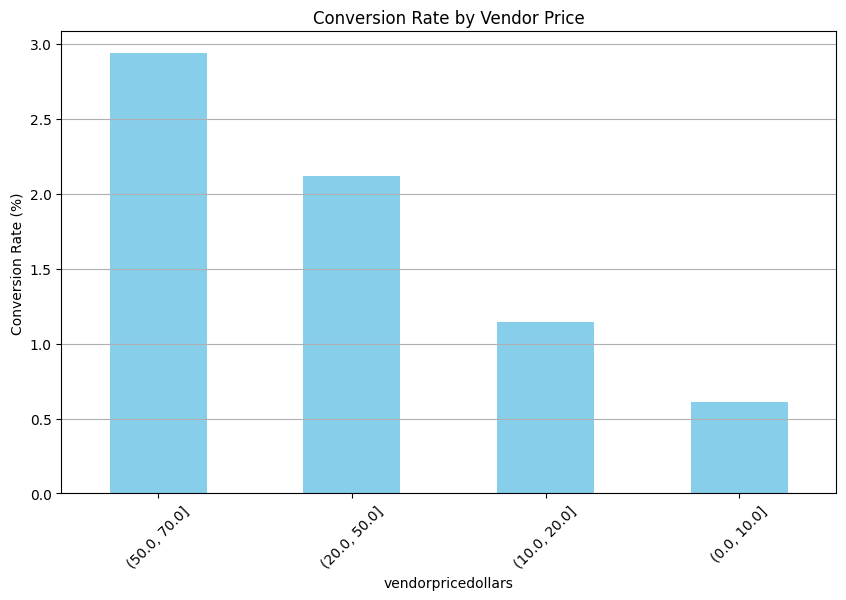

,Total Leads,Converted Leads,Conversion Rate (%)
vendorpricedollars,,,
"(50.0, 70.0]",8546,251.0,2.937047
"(20.0, 50.0]",38404,815.0,2.122175
"(10.0, 20.0]",74748,854.0,1.142505
"(0.0, 10.0]",478352,2927.0,0.611892


In [ ]:
# 12.Conversion Rate by Vendor Price
price_bins = [0, 10, 20, 50, df['vendorpricedollars'].max()]
generate_pivot_chart(df, 'vendorpricedollars', 'Conversion Rate by Vendor Price', chart_type='bar', bins=price_bins)